# Contenuti
- [Clustering](#Clustering)
- [Dataset](#Dataset)
- [k-Means](#k-Means)
- [Esercizio 1](#Esercizio-1)
- [Bisecting k-Means](#Bisecting-k-Means)
- [Esercizio 2](#Esercizio-2)
- [Valutazione del clustering](#Valutazione-del-clustering)
- [Esercizio 3](#Esercizio-3)

# Clustering

Nell'esercitazione odierna si vedrà come utilizzare utilizzare il K-means e le sue varianti messe a disposizione dalla libreria **Scikit-learn** per la risoluzione di diversi problemi di clustering.

# Dataset

Oltre ai dataset "giocattolo" e reali che abbiamo utilizzato nelle esercitazioni precedenti, la libreria **Scikit-learn** mette a disposizione anche delle funzioni per la generazione di dataset sintetici che potete trovare nella [documentazione](https://scikit-learn.org/stable/datasets/sample_generators.html). Tra queste c'è la funzione [**make_blobs(...)**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) per generare raggruppamenti di punti con distribuzione gaussiana (simile a quella che avevano implementato nelle prime esercitazioni). Variando i parametri *n_samples* (numero totale di punti generati), *centers* (numero di raggruppamenti) e *random_state* (seme iniziale per la generazione casuale) è possibile ottenere dataset differenti.

Per generare il dataset è necessario importare il modulo della libreria che lo contiene per poi richiamarla all'interno del codice. In questo caso il dataset generato contiene 100 record e 10 clusters reali.

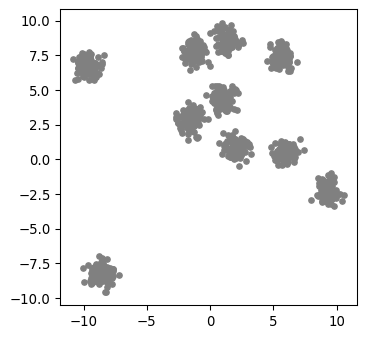

In [69]:
# Generazione di un dataset casuale
from sklearn.datasets import make_blobs
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

X_balanced, y_balanced = make_blobs(n_samples=1000, centers=10, cluster_std=0.5, random_state=0)

plt.figure(num=0, dpi=96, figsize=(4, 4))
plt.scatter(X_balanced[:,0], X_balanced[:,1], c='grey', marker='o', s=16)
plt.show()

## k-Means
La libreria Scikit-learn fornisce un'implementazione dei più importanti algoritmi di clustering. Per maggiori informazioni si rimanda alla [documentazione ufficiale](https://scikit-learn.org/stable/modules/clustering.html). 

Di seguito ci focalizzaremo sull'algoritmo [k-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) sul dataset appena generato. Nonostante si tratti di un approccio non supervisionato le operazioni necessarie per creare e addestrare il k-means con la libreria **Scikit-learn** sono uguali a quelle viste per i classificatori. 

Quindi dobbiamo prima creare un'istanza della classe e poi avviare l'agoritmo di clustering. Nel codice qui sotto, è impostato il iperparametro n_clusters = 10, quindi pari al numero di clusters reali. Si noti anche il random_state = 0, in modo che possiate ottenere tutti gli stessi risultati. Anche in questo caso usiamo il metodo **.fit(...)** che prende in input un insieme di record non etichettati (solo X) che procederà all'individuazione dei clusters.

In [70]:
#necessario per evitare warning su OS Windows
import os
os.environ["OMP_NUM_THREADS"] = "4" # export OMP_NUM_THREADS=4

#evitiamo comunque la stampa di warning 
import warnings
warnings.filterwarnings("ignore")

# Import della libreria
from sklearn.cluster import KMeans


# Definizione del numero di cluster attesi
n_clusters = 10

# Creazione dell'istanza di KMeans e addestramento
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X_balanced)

KMeans(n_clusters=10, random_state=0)

Possiamo verificare i parametri del nostro k-Means tramite il metodo **get_params()**. 

In [71]:
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 10,
 'n_init': 10,
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

Possiamo verificare i clusters ricavati dall'algoritmo tramite l'attributo *cluster_centers_*.

In [72]:
kmeans.cluster_centers_

array([[ 1.96686706,  0.8546633 ],
       [ 1.33672772,  8.52926772],
       [-8.62701691, -8.2210611 ],
       [-9.64656472,  6.71023724],
       [ 9.27517711, -2.28156264],
       [ 5.60084274,  7.32211427],
       [-1.60393905,  2.85593395],
       [ 5.97651307,  0.52895099],
       [ 0.95365177,  4.34303096],
       [-1.26344961,  7.77927415]])

Una volta individuati i cluster si può utilizzare il metodo **.predict(...)** per ricavare l'indice di appartenenza di nuovi pattern. Il risultato che si ottiene è quindi una lista dei cluster a cui sono stati assegnati i nuovi pattern.

In [73]:
# Esempio di uso del metodo predict
print('Cluster predetti:\n', kmeans.predict([[-10, -10], [-2.5, 0.0], [2.5, -4.0], [5.0, 5.0]]))

Cluster predetti:
 [2 6 0 5]


Possiamo visualizzare il risultato sull'intero dataset tramite uno scatterplot.

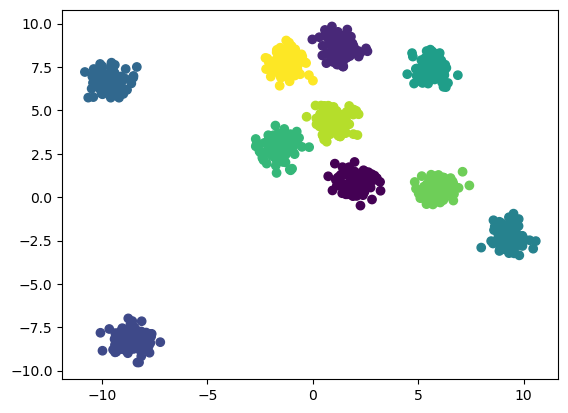

In [74]:
y_pred = kmeans.predict(X_balanced)
plt.scatter(X_balanced[:, 0], X_balanced[:, 1], c=y_pred)
plt.show()

Durante le lezioni teoriche abbiamo visto che il risultato del k-Means è sensibile all'inizializzazione, e che più inizializzazioni randomiche possono essere eseguite per determinare la migliore. Con **Scikit-learn** il numero di inizializzazioni può essere cambiato con il parametro *n_init*.

## Esercizio 1
Eseguire l'algoritmo di k-Means sul dataset generato in precedenza e sul dataset generato con il codice seguente, che presenta sempre 10 clusters reali ma non ben separati.

Verificare, facendo una serie di subplot, come cambia il risultato del clustering cambiando il parametro *n_init*.

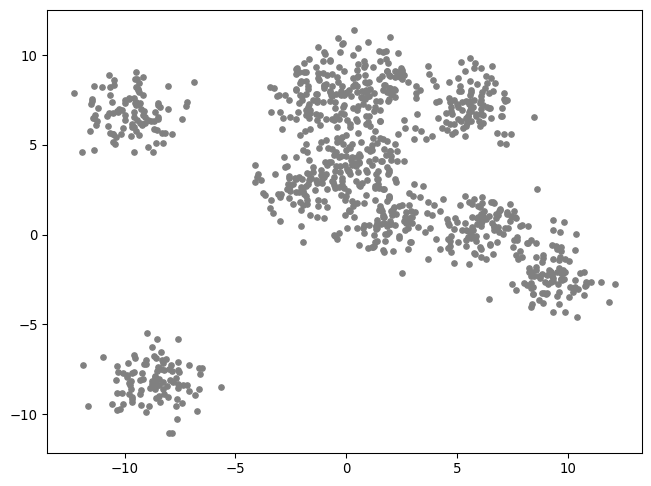

In [75]:
#creazione di un nuovo dataset con clusters reali di differenti dimensioni
X_balanced2, y_balanced2 = make_blobs(n_samples=1000, centers=10, cluster_std=1.1, random_state=0)
plt.figure(num=0, dpi=96, figsize=(8, 6))
plt.scatter(X_balanced2[:,0], X_balanced2[:,1], c='grey', marker='o', s=16)
plt.show()

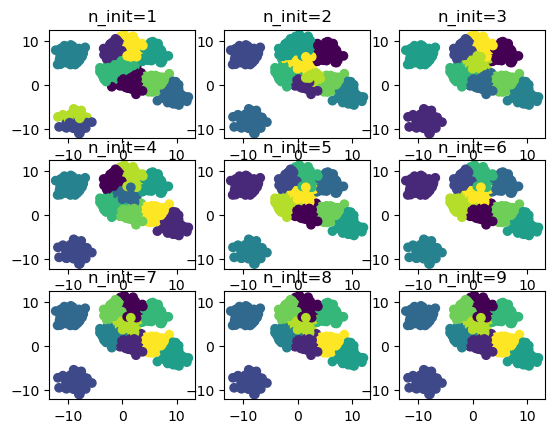

In [76]:
#Scrivi qui la soluzione
n_clusters = 10
max_n_init = 10 
n_init_range = list(range(1,max_n_init,1))
for i in n_init_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0,n_init=i)
    kmeans.fit(X_balanced2)
    y_pred = kmeans.predict(X_balanced2)
    plt.subplot(3,3,i)
    plt.scatter(X_balanced2[:, 0], X_balanced2[:, 1], c=y_pred)
    plt.title("n_init=" + str(i))
plt.show()

## Bisecting k-Means
Durante le lezioni teoriche abbiamo visto come il problema dell'inizializzazione può essere risolto adottando una variante del k-Means, il Bisecting k-Means [Bisecting k-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.BisectingKMeans.html), che partiziona i record iterativamente. 

Dopo aver importato la classe è possibile instanziare e eseguire l'algoritmo di clustering come abbiamo visto per il k-Means.

## Esercizio 2
Eseguire l'algoritmo Bisecting k-Means sui dataset generati in precedenza e sul dataset generato con il codice seguente, che presenta sempre 10 clusters reali ma con un numero di record differenti.

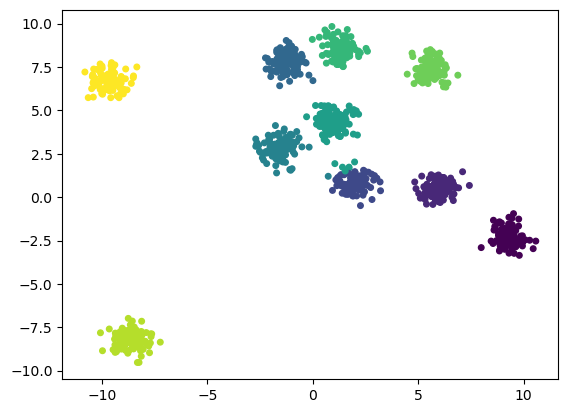

In [77]:
# bisecting k-means primo dataset bilanciato
from sklearn.cluster import BisectingKMeans

bkm = BisectingKMeans(n_clusters=10,random_state=0, n_init=10)
bkm = bkm.fit(X_balanced)
y_balanced_pred = bkm.predict(X_balanced)
plt.scatter(X_balanced[:,0], X_balanced[:,1], c=y_balanced_pred, marker='o', s=16)
plt.show()

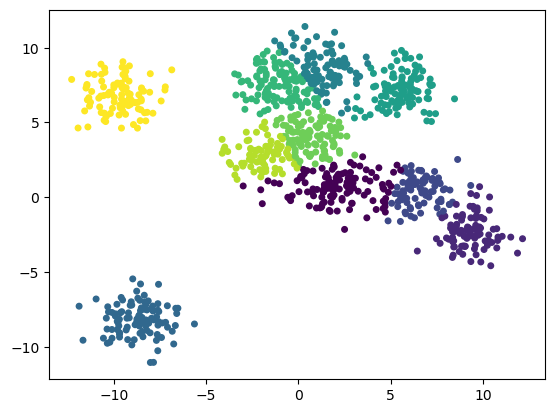

In [94]:
# secondo dataset bilanciato
bkm = BisectingKMeans(n_clusters=10,random_state=0, n_init=1)
bkm = bkm.fit(X_balanced2)
y_balanced_pred2 = bkm.predict(X_balanced2)
plt.scatter(X_balanced2[:,0], X_balanced2[:,1], c=y_balanced_pred2, marker='o', s=16)
plt.show()

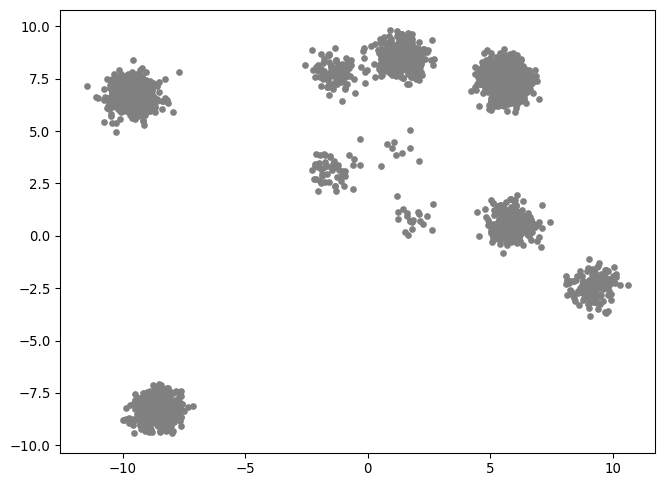

In [79]:
#creazione di un nuovo dataset con clusters reali di differenti dimensioni
X_unbalanced, y_unbalanced = make_blobs(n_samples=[10,20,50,100,150,300,380,480,600,800], cluster_std=0.5, random_state=0)
plt.figure(num=0, dpi=96, figsize=(8, 6))
plt.scatter(X_unbalanced[:,0], X_unbalanced[:,1], c='grey', marker='o', s=16)
plt.show()

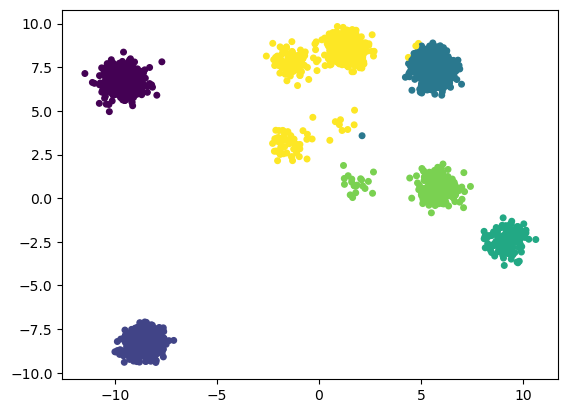

In [ ]:
#Scrivi qui la soluzione

bkm = BisectingKMeans(n_clusters=10,random_state=0, n_init=1)
bkm = bkm.fit(X_unbalanced)
y_unbalanced_pred = bkm.predict(X_unbalanced)
plt.scatter(X_unbalanced[:,0], X_unbalanced[:,1], c=y_unbalanced_pred, marker='o', s=16)
plt.show()

## Valutazione del clustering

Dato un problema di clustering non sempre si è a conoscenza del numero dei cluster reali. Questo valore devo quindi essere stimato a partire dai dati stessi. Durante le lezioni teoriche abbiamo visto che questa stima può essere eseguita analizzando l'andamento della misura interna ($SSE$) utilizzata in fase di stima dei cluster. La classe [**KMeans**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) mette a disposizione l'attributo **inertia\_** che restituisce il valore $SSE$ della soluzione ottenuta.

Un'ulteriore stima può essere eseguita studiando l'andamento del valore di silhouette. **Scikit-learn** mette a disposizione la funzione [**silhouette_score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) la quale restituisce il valore (tra 0 e 1) del clustering ottenuto.

In [81]:
#import della funzione per il calcolo del valore di silhouette
from sklearn.metrics import silhouette_score

## Esercizio 3
Eseguire la stima del numero dei cluster reali studiando l'andamento del valore SSE e del valore di silhouette nei datasets usati in precedenza.

#### Suggerimenti
- Iterare e istanziare k-Means (o Bisecting k-Means) per una serie di valori di *n_clusters* prescelti.
- dato che il valore di SSE e di silhouette non sono confrontabili eseguire plot separati o sdoppiare l'asse delle y

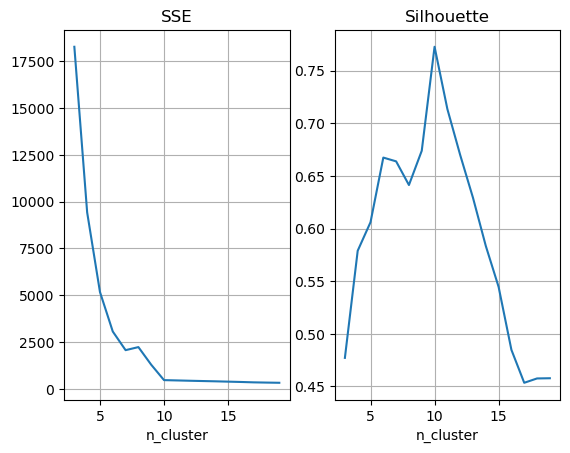

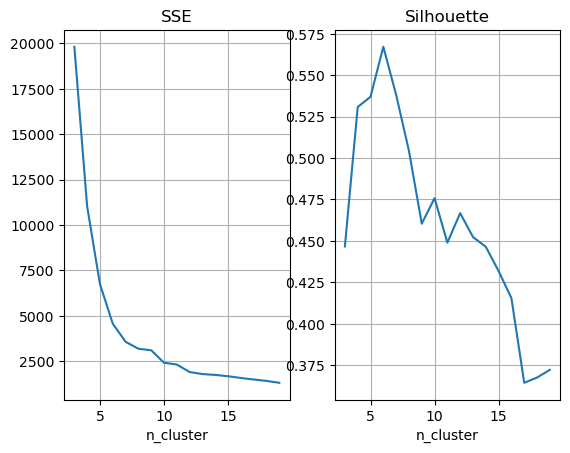

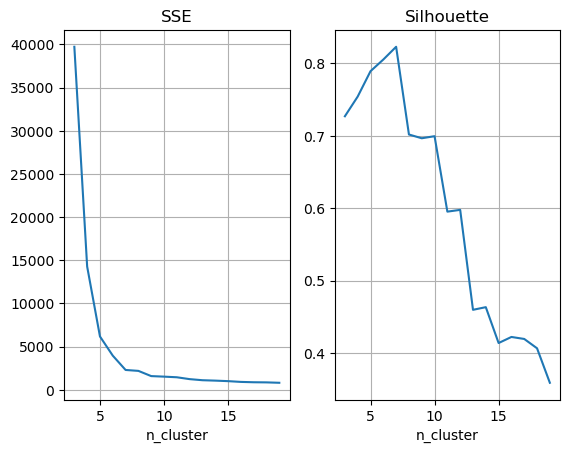

In [98]:
#Scrivi qui la soluzione
# ncluster_range = [3,7,9,10,14,20]
ncluster_range = range(3,20)
for (i,(X,y)) in enumerate([(X_balanced,y_balanced),(X_balanced2,y_balanced2),(X_unbalanced,y_unbalanced)]):
    sse = []
    sil = []
    for ncluster in ncluster_range:
        km = KMeans(n_clusters=ncluster,n_init=1,random_state=1)
        km = km.fit(X)
        y_pred = km.predict(X)
        sse = sse + [km.inertia_]
        sil = sil + [silhouette_score(X,y_pred)]
    plt.title("Dataset"+ str(i))
    plt.subplot(1,2,1)
    plt.plot(ncluster_range,sse)
    plt.title("SSE")
    plt.grid(visible=True)
    plt.xlabel("n_cluster")
    plt.subplot(1,2,2)
    plt.plot(ncluster_range,sil)
    plt.title("Silhouette")
    plt.grid(visible=True)
    plt.xlabel("n_cluster")
    plt.show()